In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

file_path = "F:\\Python\\PPG\\All data\\Patient_Signal\\PPG.csv"
data = pd.read_csv(file_path, header=None)

data.columns = ['Name', 'i', 'Bad', 'hands', 'label', 'Systolic peak', 'Diastolic peak', 'Cardiac cycle', 'Cycle Area', 'SSI', 'Peak to Valley', 'Systolic peak y', 'Delta_T', '1st Derivative cycle', '1st Derivative peak', 'Ratio_BA', 'Ratio_CA', 'Ratio_DA', 'Ratio_BDCE_A', 'Ratio_CDB_A']
# Display the first few rows of the dataframe to understand its structure
data.head()

,Name,i,Bad,hands,label,systolic peak,Diastolic peak,Cardiac cycle,Cycle Area,SSI,Peak to Valley,Systolic peak y,Delta_T,1st Derivative cycle,1st Derivative peak,Ratio_BA,Ratio_CA,Ratio_DA,Ratio_BDCE_A,Ratio_CDB_A
0,伍黃秀霞,1,Right,Left,1,1278.0,0.390019,993.0,315.004855,987.0,720.0,0.516570,-1277.609981,1000.0,0.447513,1.022991,1.029483,1.047664,-2.109080,1.022221
1,伍黃秀霞,1,Right,Right,1,1265.0,0.275706,977.0,267.261331,995.0,714.0,0.485722,-1264.724294,994.0,0.327676,0.999176,0.997674,0.993834,-1.982910,1.000930
2,伍黃秀霞,3,Right,Left,1,1280.0,0.344179,997.0,307.701319,1011.0,718.0,0.468073,-1279.655821,994.0,0.427002,1.027341,1.050224,1.074771,-2.195227,1.027423
3,伍黃秀霞,3,Right,Right,1,1278.0,0.350065,979.0,286.925793,1011.0,705.0,0.506998,-1277.649935,1005.0,0.343972,0.991613,0.974413,0.961078,-1.887815,0.991555
4,伍黃秀霞,5,Right,Left,1,1296.0,0.354134,1000.0,318.004937,1009.0,701.0,0.428415,-1295.645866,996.0,0.360314,1.029600,1.045462,1.071122,-2.174579,1.028988


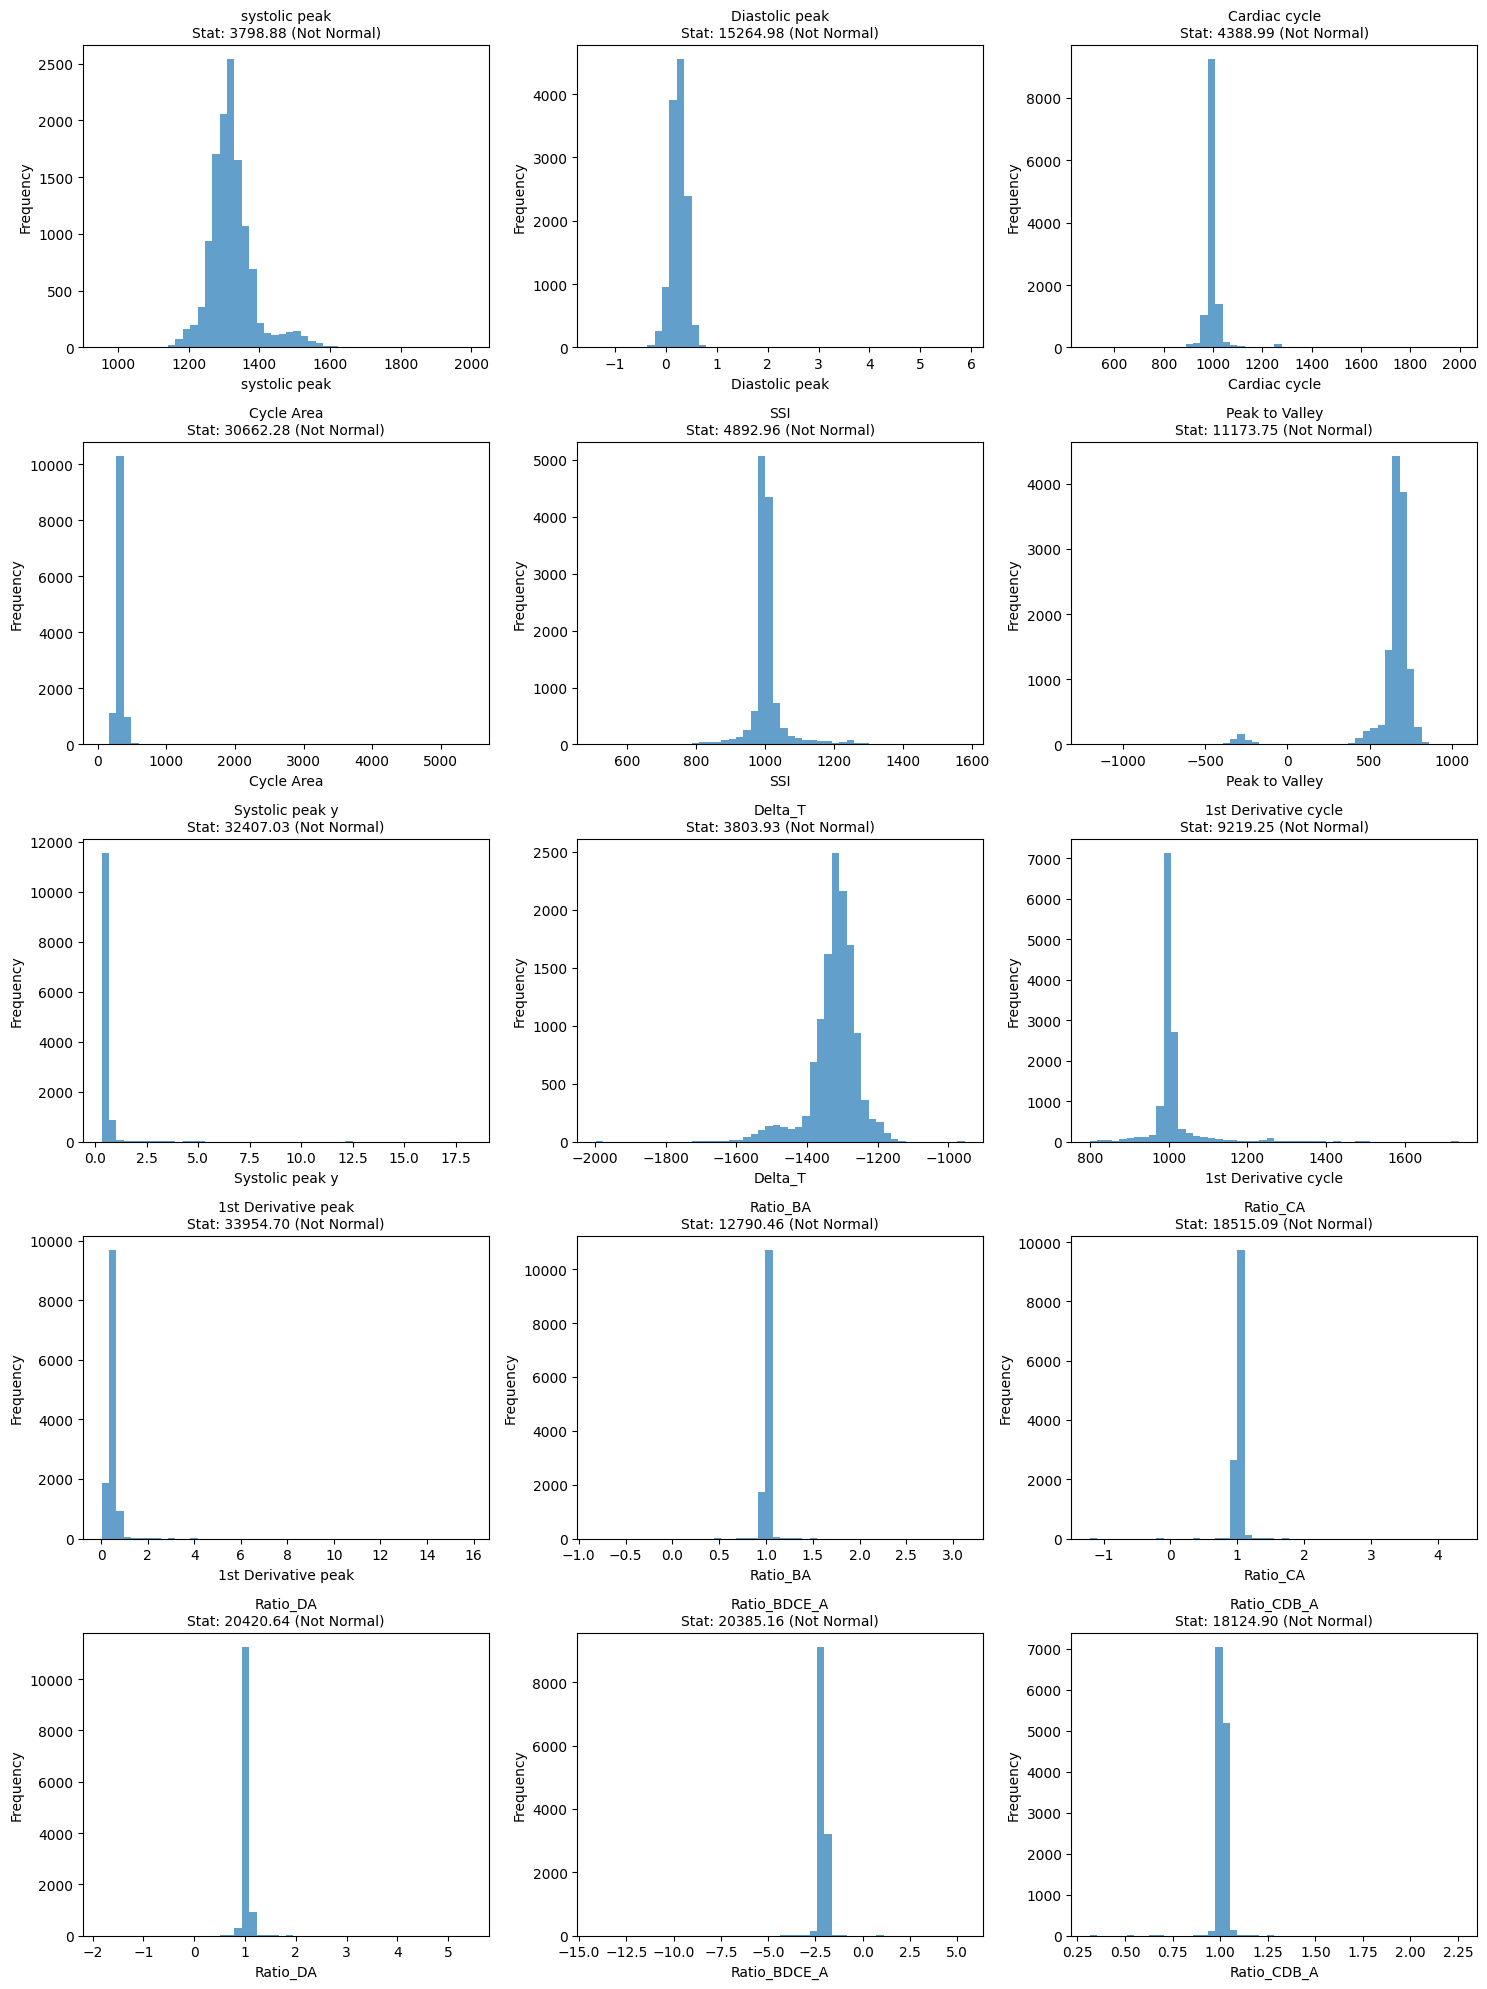

In [13]:
from scipy import stats

info_columns = data[['Name', 'i', 'Bad', 'hands']]
X = data.iloc[:, 5:]  # 特徵列
y = data['label']     # 標籤列

#每個x的特徵是否符合常態分佈並繪製成圖表，在title上標記是否為常態分佈
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for idx, col in enumerate(X.columns):
    ax = axes[idx]
    stat, p = stats.normaltest(X[col])
    ax.hist(X[col], bins=50, alpha=0.7)
    ax.set_title(f"{col}\nStat: {stat:.2f} {'(Normal)' if p > 0.05 else '(Not Normal)'}", fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

# Hide any unused subplots
for idx in range(len(X.columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

